In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [351]:
def import_data(tsv_file: str) -> pd.DataFrame:
    df = pd.read_csv(tsv_file, delimiter="\t", dtype=object)
    df.fillna('', inplace=True)
    
    df.columns = ['id', 'label', 'statement', 'subjects', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', 'count_1','count_2','count_3','count_4','count_5', 'context']
    return df

In [352]:
train_df = import_data('liar_dataset/train.tsv')

In [353]:
train_df.shape

(10239, 14)

In [354]:
test_df = import_data('liar_dataset/test.tsv')
test_df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,,Rhode Island,republican,1,2,1,1,0,a campaign website


In [355]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [356]:
val_df = import_data('liar_dataset/valid.tsv')
val_df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,,,none,11,43,8,5,105,
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [357]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 10239 non-null  object
 1   label              10239 non-null  object
 2   statement          10239 non-null  object
 3   subjects           10239 non-null  object
 4   speaker            10239 non-null  object
 5   speaker_job_title  10239 non-null  object
 6   state_info         10239 non-null  object
 7   party_affiliation  10239 non-null  object
 8   count_1            10239 non-null  object
 9   count_2            10239 non-null  object
 10  count_3            10239 non-null  object
 11  count_4            10239 non-null  object
 12  count_5            10239 non-null  object
 13  context            10239 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [358]:
train_df['label'].value_counts()

label
half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

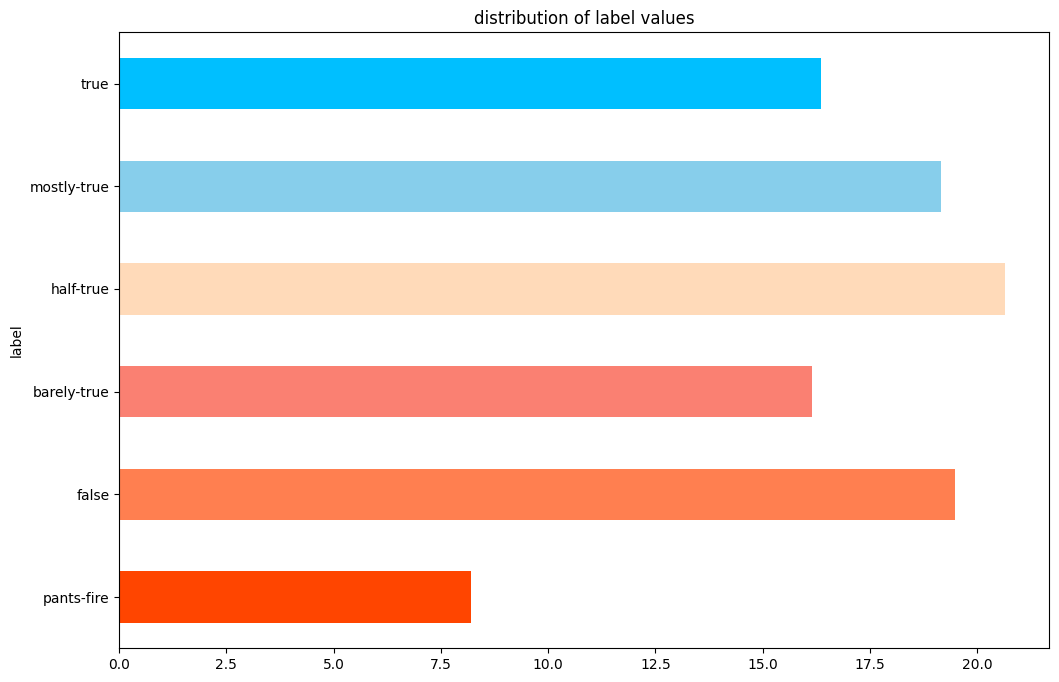

In [359]:
import seaborn as sns
def label_bar_chart(input_df: pd.DataFrame):
    label_frequency = input_df['label'].value_counts(normalize=True)
    def multiply_100(x):
        return x*100
    label_frequency = label_frequency.apply(multiply_100)
    
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    colors = [
        'orangered',
        'coral',
        'salmon',
        'peachpuff',
        'skyblue',
        'deepskyblue'
    ]
    label_frequency = label_frequency.reindex(index=labels)
    axis = label_frequency.plot(kind='barh', figsize=(12,8), color = colors)
    axis.set_title(f'distribution of label values')

label_bar_chart(train_df)

In [360]:
num_unique_speakers = train_df['speaker'].nunique()
num_unique_speakers

2910

In [361]:
avg_statements = len(train_df)/num_unique_speakers

In [362]:
avg_statements

3.5185567010309278

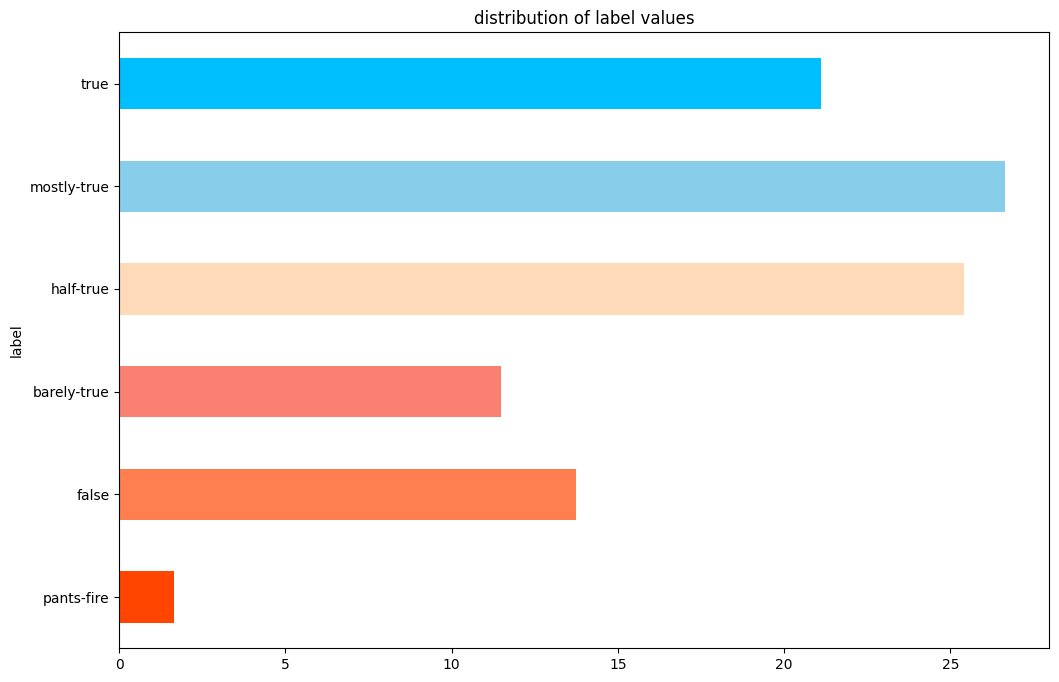

In [363]:
def speaker_label_barchart(input_df: pd.DataFrame, speaker:str)-> pd.DataFrame:
    speaker_df = input_df[input_df['speaker'] == speaker]
    speaker_df.reset_index(inplace=True)
    label_bar_chart(speaker_df)
    return speaker_df
ret_df = speaker_label_barchart(train_df, 'barack-obama')

In [364]:
speakers = train_df['speaker'].unique()

In [365]:
train_df['subjects'].nunique()

3828

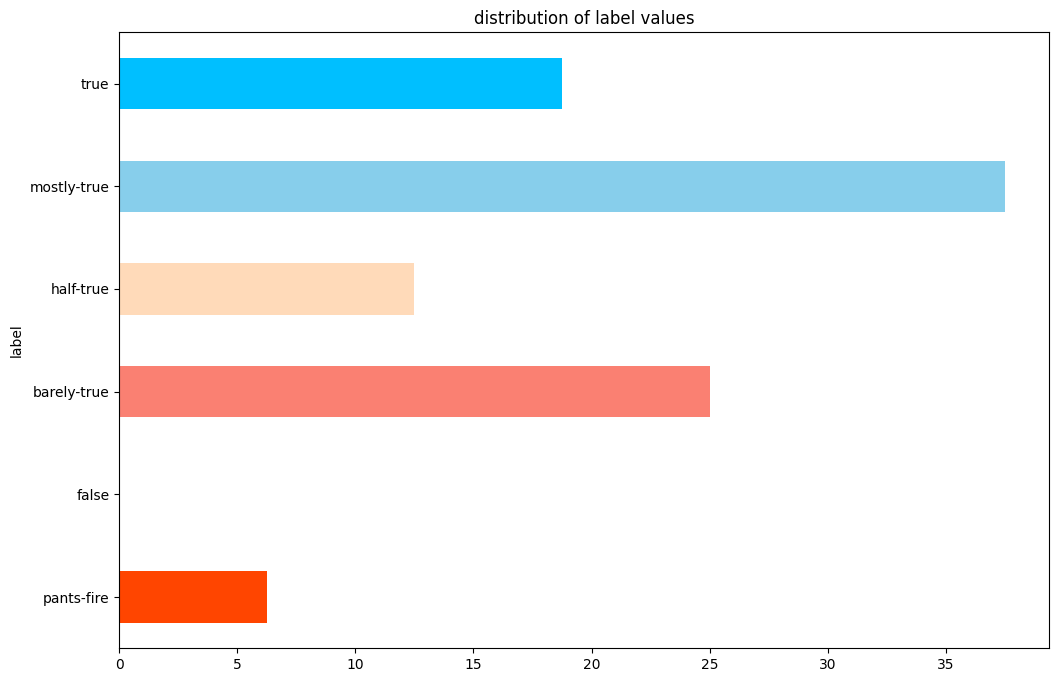

In [366]:
def subject_label_barchart(input_df: pd.DataFrame, subject:str)-> pd.DataFrame:
    subject_df = input_df[input_df['subjects'] == subject]
    subject_df.reset_index(inplace=True)
    label_bar_chart(subject_df)
    return subject_df
ret_df = subject_label_barchart(train_df, 'poverty')

In [367]:
len(train_df[(train_df['subjects']=='poverty') & (train_df['label'] == 'false')])

0

In [368]:
# train_df['splitted_col'] = train_df['statement'].str.split()
# test_df['splitted_col'] = test_df['statement'].str.split()

In [369]:
train_df['id'] = train_df['id'].str.replace('.json', '')
test_df['id'] = test_df['id'].str.replace('.json', '')
val_df['id'] = val_df['id'].str.replace('.json', '')

In [370]:
train_df['subjects_sep'] = train_df['subjects'].str.split(',')
train_df = train_df.explode('subjects_sep')
test_df['subjects_sep'] = test_df['subjects'].str.split(',')
test_df = test_df.explode('subjects_sep')
val_df['subjects_sep'] = val_df['subjects'].str.split(',')
val_df = val_df.explode('subjects_sep')

In [371]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [372]:
# df = train_df['statement']+train_df['speaker']
# df[0]

In [373]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# train_df['label_encoded']=le.fit_transform(train_df['label'])
# test_df['label_encoded']=le.fit_transform(test_df['label'])

In [374]:
train_df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context,subjects_sep
0,10540,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,energy
1,10540,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,history
2,10540,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,job-accomplishments
3,324,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver,foreign-policy
4,1123,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release,health-care


In [375]:
train_df.rename(columns={'party_affiliation': 'party'}, inplace=True)
test_df.rename(columns={'party_affiliation': 'party'}, inplace=True)
val_df.rename(columns={'party_affiliation': 'party'}, inplace=True)

In [376]:
def party_label_barchart(input_df: pd.DataFrame, party:str)-> pd.DataFrame:
    party_df = input_df[input_df['party'] == party]
    party_df.reset_index(inplace=True)
    label_bar_chart(party_df)
    return party_df

In [377]:
train_df['party'].unique()

array(['democrat', 'none', 'republican', 'organization', 'independent',
       'columnist', 'activist', 'talk-show-host', 'libertarian',
       'newsmaker', 'journalist', 'labor-leader', 'state-official',
       'business-leader', 'education-official', 'tea-party-member', '',
       'green', 'liberal-party-canada', 'government-body', 'Moderate',
       'democratic-farmer-labor', 'ocean-state-tea-party-action',
       'constitution-party'], dtype=object)

<Axes: ylabel='party'>

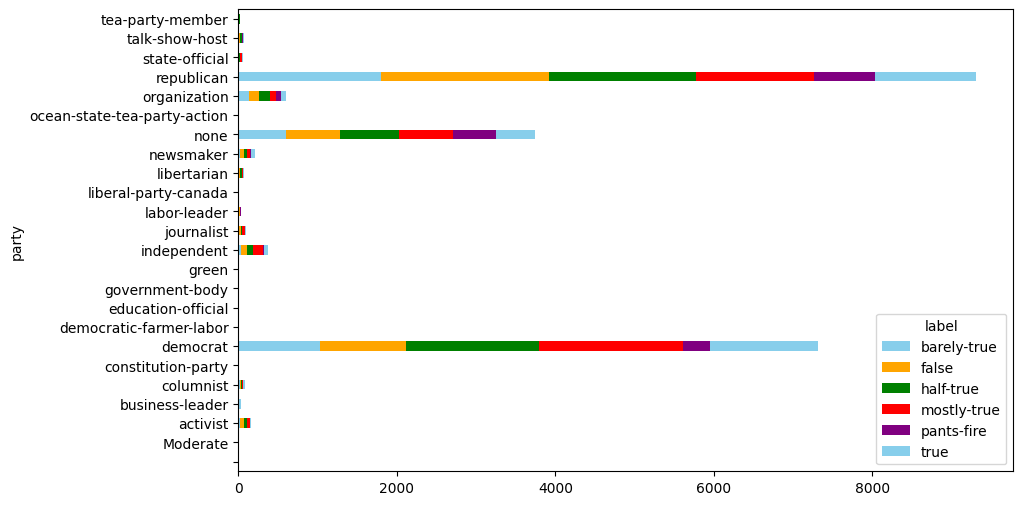

In [378]:
party_label_counts = train_df.groupby(['party', 'label']).size().unstack(fill_value=0)
party_label_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red', 'purple'])

In [379]:
colors = [
        'orangered',
        'coral',
        'salmon',
        'peachpuff',
        'skyblue',
        'deepskyblue'
    ]

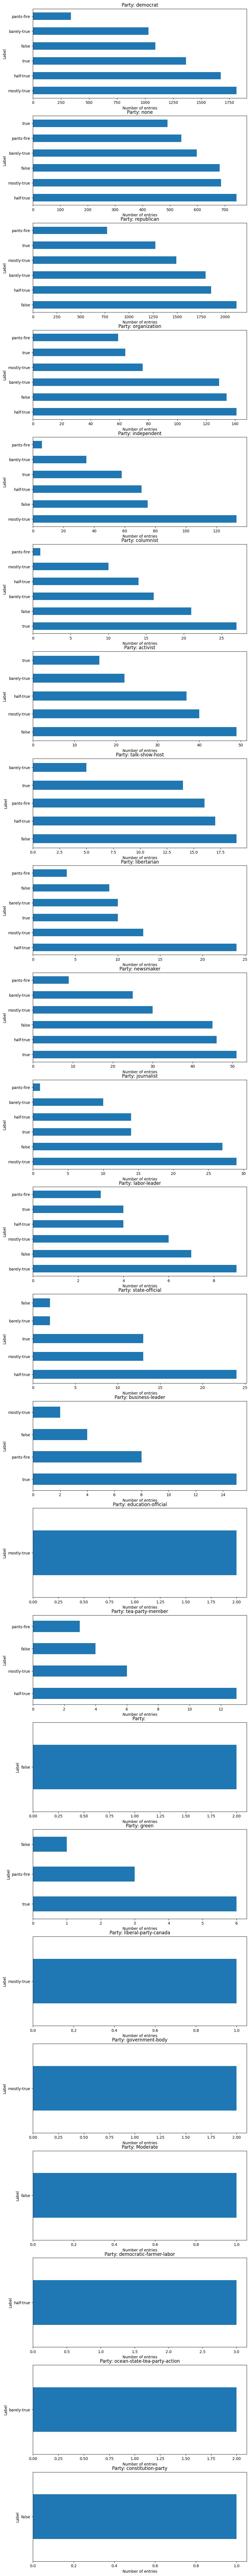

In [380]:
party_list = train_df['party'].unique()
figs, axes = plt.subplots(nrows=len(party_list), ncols=1, figsize=(10, len(party_list) * 5))
for ax, party in zip(axes, party_list):
    party_data = train_df[train_df['party'] == party]['label'].value_counts()
    party_data.plot(kind='barh', ax=ax)
    ax.set_title(f'Party: {party}')
    ax.set_xlabel('Number of entries')
    ax.set_ylabel('Label')

plt.show()

In [381]:
# speaker_list = train_df['speaker'].unique()
# fig, axes = plt.subplots(nrows=len(speaker_list), ncols=1, figsize=(10, len(party_list) * 5))
# for ax, speaker in zip(axes, speaker_list):
#     speaker_data = train_df[train_df['speaker'] == speaker]['label'].value_counts()
#     speaker_data.plot(kind='barh', ax=ax, color=colors)
#     ax.set_title(f'Speaker: {speaker}')
#     ax.set_xlabel('Number of entries')
#     ax.set_ylabel('Label')
    
# plt.tight_layout()
# plt.show()

In [382]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rutur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [383]:
train_df.columns

Index(['id', 'label', 'statement', 'subjects', 'speaker', 'speaker_job_title',
       'state_info', 'party', 'count_1', 'count_2', 'count_3', 'count_4',
       'count_5', 'context', 'subjects_sep'],
      dtype='object')

In [384]:
test_df.columns

Index(['id', 'label', 'statement', 'subjects', 'speaker', 'speaker_job_title',
       'state_info', 'party', 'count_1', 'count_2', 'count_3', 'count_4',
       'count_5', 'context', 'subjects_sep'],
      dtype='object')

In [385]:
# train_df = train_df[['id','label','splitted_col','subjects_sep','label_encoded','speaker','speaker_job_title','state_info','party']]
# train_df.head()

In [386]:
# train_df['party_encoded'] = le.fit_transform(train_df['party'])
# train_df['state_info_encoded'] = le.fit_transform(train_df['state_info'])
# train_df['speaker_job_title_encoded'] = le.fit_transform(train_df['speaker_job_title'])

In [387]:
# train_df.head()

In [388]:
train_df = train_df.drop('subjects', axis=1)
test_df = test_df.drop('subjects', axis=1)
val_df = val_df.drop('subjects', axis=1)

In [389]:
train_df.head()

,id,label,statement,speaker,speaker_job_title,state_info,party,count_1,count_2,count_3,count_4,count_5,context,subjects_sep
0,10540,half-true,When did the decline of coal start? It started...,scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,energy
1,10540,half-true,When did the decline of coal start? It started...,scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,history
2,10540,half-true,When did the decline of coal start? It started...,scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,job-accomplishments
3,324,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver,foreign-policy
4,1123,false,Health care reform legislation is likely to ma...,blog-posting,,,none,7,19,3,5,44,a news release,health-care


In [390]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

In [391]:
def remove_stopwords(texts):
    cleaned_texts = []
    for text in texts:
        words = text.split()
        cleaned_text = ' '.join([stemmer.stem(word) for word in words if word.lower() not in stop_words])
        cleaned_texts.append(cleaned_text)
    return cleaned_texts

In [392]:
train_df['statement'] = remove_stopwords(train_df['statement'])
train_df['context'] = remove_stopwords(train_df['context'])

In [393]:
test_df['statement'] = remove_stopwords(test_df['statement'])
val_df['statement'] = remove_stopwords(val_df['statement'])
test_df['context'] = remove_stopwords(test_df['context'])
val_df['context'] = remove_stopwords(val_df['context'])

In [394]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

all_texts = pd.concat([train_df['statement'], test_df['statement'], val_df['statement'], train_df['context'], test_df['context'], val_df['context']])
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(all_texts)
# type(all_texts)

In [395]:
X_train = tokenizer.texts_to_sequences(train_df['statement'])
X_test = tokenizer.texts_to_sequences(test_df['statement'])
X_val = tokenizer.texts_to_sequences(val_df['statement'])

In [396]:
max_len = 50
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')

In [397]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
y_train = le.fit_transform(train_df['label'])
y_test = le.fit_transform(test_df['label'])
y_val = le.fit_transform(val_df['label'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [398]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

def call_model_LSTM():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length = max_len))
    model.add(LSTM(64))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(le.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [399]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
694/694 [==============================] - 9s 10ms/step - loss: 1.7566 - accuracy: 0.2085 - val_loss: 1.7594 - val_accuracy: 0.2056
Epoch 2/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7549 - accuracy: 0.2083 - val_loss: 1.7583 - val_accuracy: 0.2028
Epoch 3/15
694/694 [==============================] - 8s 11ms/step - loss: 1.7389 - accuracy: 0.2247 - val_loss: 1.7662 - val_accuracy: 0.2143
Epoch 4/15
694/694 [==============================] - 7s 11ms/step - loss: 1.5975 - accuracy: 0.3060 - val_loss: 1.9184 - val_accuracy: 0.2060
Epoch 5/15
694/694 [==============================] - 7s 10ms/step - loss: 1.3803 - accuracy: 0.4314 - val_loss: 2.0790 - val_accuracy: 0.2368
Epoch 6/15
694/694 [==============================] - 7s 10ms/step - loss: 1.1254 - accuracy: 0.5937 - val_loss: 2.2949 - val_accuracy: 0.2277
Epoch 7/15
694/694 [==============================] - 8s 11ms/step - loss: 0.8989 - accuracy: 0.7081 - val_loss: 2.5568 - val_accuracy: 0.2176

In [400]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy: {test_accuracy:.2f}')

85/85 [==============================] - 0s 4ms/step - loss: 3.1442 - accuracy: 0.2035
Test_Accuracy: 0.20


In [402]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

def call_model_bi():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length = max_len))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(le.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = call_model_bi()
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
694/694 [==============================] - 14s 16ms/step - loss: 1.5226 - accuracy: 0.3859 - val_loss: 1.9351 - val_accuracy: 0.2285
Epoch 2/15
694/694 [==============================] - 10s 15ms/step - loss: 0.8148 - accuracy: 0.7214 - val_loss: 2.3767 - val_accuracy: 0.2429
Epoch 3/15
694/694 [==============================] - 11s 16ms/step - loss: 0.4794 - accuracy: 0.8436 - val_loss: 2.8201 - val_accuracy: 0.2422
Epoch 4/15
694/694 [==============================] - 11s 16ms/step - loss: 0.3210 - accuracy: 0.8976 - val_loss: 3.3244 - val_accuracy: 0.2343
Epoch 5/15
694/694 [==============================] - 11s 16ms/step - loss: 0.2400 - accuracy: 0.9240 - val_loss: 3.8366 - val_accuracy: 0.2339
Epoch 6/15
694/694 [==============================] - 10s 15ms/step - loss: 0.1711 - accuracy: 0.9453 - val_loss: 4.3525 - val_accuracy: 0.2328
Epoch 7/15
694/694 [==============================] - 11s 15ms/step - loss: 0.1386 - accuracy: 0.9548 - val_loss: 4.6389 - val_accuracy:

In [403]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy: {test_accuracy:.2f}')

85/85 [==============================] - 1s 7ms/step - loss: 7.3988 - accuracy: 0.2182
Test_Accuracy: 0.22


In [405]:
from keras.layers import GRU
def call_model_GRU():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length = max_len))
    model.add(GRU(64))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(le.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

import numpy as np
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

model = call_model_GRU()
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
694/694 [==============================] - 8s 10ms/step - loss: 1.7564 - accuracy: 0.2043 - val_loss: 1.7584 - val_accuracy: 0.2028
Epoch 2/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7544 - accuracy: 0.2078 - val_loss: 1.7581 - val_accuracy: 0.2056
Epoch 3/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7545 - accuracy: 0.2082 - val_loss: 1.7588 - val_accuracy: 0.2056
Epoch 4/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7538 - accuracy: 0.2088 - val_loss: 1.7590 - val_accuracy: 0.2028
Epoch 5/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7531 - accuracy: 0.2096 - val_loss: 1.7606 - val_accuracy: 0.2028
Epoch 6/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7530 - accuracy: 0.2087 - val_loss: 1.7609 - val_accuracy: 0.2028
Epoch 7/15
694/694 [==============================] - 7s 10ms/step - loss: 1.7532 - accuracy: 0.2102 - val_loss: 1.7579 - val_accuracy: 0.2028

In [406]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy: {test_accuracy:.2f}')

85/85 [==============================] - 0s 5ms/step - loss: 1.7482 - accuracy: 0.2090
Test_Accuracy: 0.21


In [409]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
def call_model_CNN():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(le.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = call_model_CNN()
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
694/694 [==============================] - 6s 8ms/step - loss: 1.4379 - accuracy: 0.4234 - val_loss: 2.0715 - val_accuracy: 0.2201
Epoch 2/15
694/694 [==============================] - 5s 7ms/step - loss: 0.4847 - accuracy: 0.8419 - val_loss: 2.5329 - val_accuracy: 0.2136
Epoch 3/15
694/694 [==============================] - 5s 7ms/step - loss: 0.1148 - accuracy: 0.9652 - val_loss: 3.6853 - val_accuracy: 0.2172
Epoch 4/15
694/694 [==============================] - 5s 8ms/step - loss: 0.0385 - accuracy: 0.9893 - val_loss: 4.9653 - val_accuracy: 0.2303
Epoch 5/15
694/694 [==============================] - 5s 8ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 5.5918 - val_accuracy: 0.2230
Epoch 6/15
694/694 [==============================] - 5s 7ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 5.6227 - val_accuracy: 0.2332
Epoch 7/15
694/694 [==============================] - 5s 8ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 5.7974 - val_accuracy: 0.2339
Epoch 

In [410]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test_Accuracy: {test_accuracy:.2f}')

85/85 [==============================] - 0s 3ms/step - loss: 6.6784 - accuracy: 0.2400
Test_Accuracy: 0.24
